#  Data Exploration and Preparation

In [2]:
import pandas as pd

In [3]:
transactions=pd.read_csv("data/AML_sample_transactions.csv")
transactions.head()

,txn_id,txn_timestamp,txn_type,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,customer_country,branch_id,debit_credit,counterparty_id,counterparty_acct_id,counterparty_first_name,counterparty_last_name,counterparty_state,counterparty_country
0,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,Credit,69975.0,5947.0,NaN,NaN,NaN,AUT
1,50001,2018-03-01T10:26:03Z,WIRE,139.12,NaN,69975,5947,NaN,AUT,NaN,Debit,17850.0,4926.0,NaN,NaN,NaN,ITA
2,50002,2018-03-01T10:28:03Z,WIRE,22.20,NaN,17850,4926,NaN,ITA,NaN,Credit,70141.0,6851.0,NaN,NaN,NaN,CHE
3,50003,2018-03-01T10:28:03Z,WIRE,22.20,NaN,70141,6851,NaN,CHE,NaN,Debit,17850.0,4926.0,NaN,NaN,NaN,ITA
4,50004,2018-03-01T10:34:03Z,ATM,278.73,NaN,70494,6450,NaN,MEX,NaN,Credit,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transactions.dtypes

txn_id                       int64
txn_timestamp               object
txn_type                    object
txn_amount                 float64
txn_desc                   float64
customer_id                  int64
customer_acct_id             int64
customer_acct_bal          float64
customer_country            object
branch_id                  float64
debit_credit                object
counterparty_id            float64
counterparty_acct_id       float64
counterparty_first_name    float64
counterparty_last_name     float64
counterparty_state         float64
counterparty_country        object
dtype: object

In [5]:
transactions.shape

(41106, 17)

In [6]:
alert_scored=pd.read_csv("data/AML_sample_alert_scored.csv")
alert_scored.head()

,alert_id,src_sys,src_id,cust_id,acct_id,start_ts,end_ts,priority,susptype1,susptype2,...,desc_3,creater_id,create_ts,review_state,review_ts,review_oper,status,closed_ts,disposition_oper,fp_tp_tag
0,6,1,6,17315,4547,2019-03-17T14:58:03Z,NaN,low,CR-T,4,...,NaN,Prime,2019-03-17T14:58:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
1,7,1,7,17315,4547,2019-03-17T13:58:03Z,NaN,high,CR-T,3,...,NaN,Prime,2019-03-17T13:58:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
2,8,1,8,17315,4547,2019-03-11T17:58:03Z,NaN,medium,CR-T,2,...,NaN,Prime,2019-03-11T17:58:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
3,9,1,9,17315,4547,2019-03-10T17:58:03Z,NaN,medium,CR-C,3,...,NaN,Prime,2019-03-10T17:58:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
4,10,1,10,17315,4547,2019-03-10T16:58:03Z,NaN,low,CR-T,1,...,NaN,Prime,2019-03-10T16:58:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP


In [7]:
alert_scored.shape

(3855, 26)

In [8]:
accountMapping=pd.read_csv("data/AML_sample_accountMapping.csv")
accountMapping.head()

,cust_acct_mapping_id,acct_id,cust_id,cust_acct_role,src_sys,data_dump_dt
0,1,1000,12346,Primary,1,2018-04-17T16:18:22.696603Z
1,2,1001,12347,Primary,1,2018-04-17T16:18:22.696603Z
2,3,1002,12348,Primary,1,2018-04-17T16:18:22.696603Z
3,4,1003,12349,Primary,1,2018-04-17T16:18:22.696603Z
4,5,1004,12350,Primary,1,2018-04-17T16:18:22.696603Z


In [9]:
accounts=pd.read_csv("data/AML_sample_accounts.csv")
accounts.head()

,acct_id,tax_id,alt_id,dsply_nm,type,initial_deposit,balance,net_wrth_prd_end,acct_peer_grp_intrl_id,acct_rptng_crncy,...,acct_segment,dormant_status_flag,frozen_status_flag,acct_efctv_risk,acct_bus_risk,cstm_risk1,past_confirmed_fraud,past_suspected_fraud,prior_sar_count,customized_1
0,1000,NaN,NaN,1000,SAV,NaN,NaN,NaN,NaN,GBP,...,NaN,N,N,NaN,NaN,NaN,0,0,0,NaN
1,1001,NaN,NaN,1001,SAV,NaN,NaN,NaN,NaN,GBP,...,NaN,N,N,NaN,NaN,NaN,0,0,0,NaN
2,1002,NaN,NaN,1002,CHK,NaN,NaN,NaN,NaN,GBP,...,NaN,N,N,NaN,NaN,NaN,0,0,0,NaN
3,1003,NaN,NaN,1003,CHK,NaN,NaN,NaN,NaN,GBP,...,NaN,N,N,NaN,NaN,NaN,0,0,0,NaN
4,1004,NaN,NaN,1004,MM,NaN,NaN,NaN,NaN,GBP,...,NaN,N,N,NaN,NaN,NaN,0,0,0,NaN


In [10]:
individuals=pd.read_csv("data/AML_sample_individuals.csv")
individuals.head()

,partyId,isActive,externalRegisteredNumber,externalSystemName,isIndividual,partyType,sourceTimestamp,lastReviewTime,nextReviewTime,countryofResidency,...,birthPlaceCountry,occupation,sourceofIncome,incomeLevel,race,ethnicity,chatAddress,voiceDeviceId,voiceLoginId,GDPR_Delete
0,1536,NaN,17324,CEDM,1,individual,2018-11-28T01:59:51.217-08:00,2017-12-25T03:52:23.000-08:00,2018-04-05T00:44:11.000-07:00,PRT,...,PRT,Hair Stylist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1537,NaN,13350,CEDM,1,individual,2018-11-28T01:59:51.217-08:00,2017-12-29T02:57:56.000-08:00,2018-04-11T18:49:37.000-07:00,MEX,...,MEX,Nuclear Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1538,NaN,14878,CEDM,1,individual,2018-11-28T01:59:51.217-08:00,2017-12-01T10:22:38.000-08:00,2018-07-03T20:09:37.000-07:00,USA,...,USA,Judge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1539,NaN,13351,CEDM,1,individual,2018-11-28T01:59:51.217-08:00,2017-12-11T17:28:42.000-08:00,2018-03-03T07:57:16.000-08:00,TUR,...,TUR,Skincare Specialist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1540,NaN,17325,CEDM,1,individual,2018-11-28T01:59:51.217-08:00,2017-10-12T16:38:22.000-07:00,2018-09-21T17:49:39.000-07:00,NOR,...,NOR,Psychiatrist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
## test data not using now
# accounts=pd.read_csv("data/AML_sample_alerts_5.csv")
# accounts.head()

In [12]:
new_df=pd.merge(transactions, alert_scored, how='left', left_on=['customer_id','customer_acct_id'], right_on=['cust_id','acct_id'])
new_df.head()

,txn_id,txn_timestamp,txn_type,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,customer_country,branch_id,...,desc_3,creater_id,create_ts,review_state,review_ts,review_oper,status,closed_ts,disposition_oper,fp_tp_tag
0,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,Prime,2018-05-11T16:38:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
1,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,Prime,2018-03-02T17:27:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
2,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,Prime,2018-03-02T17:26:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
3,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,Prime,2018-03-02T17:25:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP
4,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,Prime,2018-03-02T17:24:03Z,NaN,NaN,NaN,Closed,NaN,NaN,TP


In [13]:
new_df.shape

(253564, 43)

In [14]:
new_df['disposition'].unique()

array(['SAR', 'Escalated', nan, 'Waived'], dtype=object)

In [15]:
new_df=new_df.replace({'disposition': {'SAR': 1, 'Waived': 0, 'Escalated':1}})

In [16]:
# new_df['Hour']=((new_df['txn_timestamp'].astype(int)/(60*60))%24).apply(np.floor)
# new_df['Day']=((new_df['txn_timestamp'].astype(int)/(24*60*60))%7).apply(np.ceil)
# new_df=new_df.drop('txn_timestamp', axis=1)

In [17]:
new_df['txn_type'].unique()

array(['WIRE', 'ATM', 'ACH'], dtype=object)

In [18]:
new_df['customer_country'].unique()

array(['ITA', 'AUT', 'CHE', 'MEX', 'FRA', 'NOR', 'ESP', 'DEU', 'DNK',
       'GRC', 'CAN', 'IND', 'GBR', 'FIN', 'NLD', 'CHN', 'USA', 'BRA',
       'AUS', 'SWE', 'RUS', 'JPN', 'PRT', 'ZAF', 'TUR'], dtype=object)

In [19]:
new_df['debit_credit'].unique()

array(['Credit', 'Debit'], dtype=object)

In [20]:
new_df['counterparty_country'].unique()

array(['AUT', 'ITA', 'CHE', nan, 'NOR', 'FRA', 'ESP', 'DNK', 'DEU', 'CAN',
       'GRC', 'IND', 'GBR', 'FIN', 'NLD', 'CHN', 'BRA', 'USA', 'AUS',
       'SWE', 'RUS', 'MEX', 'PRT', 'JPN', 'ZAF', 'TUR'], dtype=object)

In [21]:
new_df['start_ts'].unique()

array(['2018-05-11T16:38:03Z', '2018-03-02T17:27:03Z',
       '2018-03-02T17:26:03Z', ..., '2018-03-15T19:04:03Z',
       '2019-01-19T15:03:03Z', '2019-02-13T10:52:03Z'], dtype=object)

In [22]:
new_df['priority'].unique()

array(['low', 'high', 'medium', nan], dtype=object)

In [23]:
new_df['susptype1'].unique()

array(['CR-T', 'CR-H', 'CR-S', 'CR-C', nan], dtype=object)

In [24]:
new_df['creater_id'].unique()

array(['Prime', nan], dtype=object)

In [25]:

new_df['fp_tp_tag'].unique()

array(['TP', nan, 'FP'], dtype=object)

In [26]:
new_df['start_ts'].unique()

array(['2018-05-11T16:38:03Z', '2018-03-02T17:27:03Z',
       '2018-03-02T17:26:03Z', ..., '2018-03-15T19:04:03Z',
       '2019-01-19T15:03:03Z', '2019-02-13T10:52:03Z'], dtype=object)

In [27]:
import time
import datetime
new_df['year'] = pd.DatetimeIndex(new_df['txn_timestamp']).year
new_df['day'] = pd.DatetimeIndex(new_df['txn_timestamp']).day
new_df['hour'] = pd.DatetimeIndex(new_df['txn_timestamp']).hour
new_df['month'] = pd.DatetimeIndex(new_df['txn_timestamp']).month
new_df.head(50)

,txn_id,txn_timestamp,txn_type,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,customer_country,branch_id,...,review_ts,review_oper,status,closed_ts,disposition_oper,fp_tp_tag,year,day,hour,month
0,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
1,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
2,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
3,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
4,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
5,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
6,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
7,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
8,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3
9,50000,2018-03-01T10:26:03Z,WIRE,139.12,NaN,17850,4926,NaN,ITA,NaN,...,NaN,NaN,Closed,NaN,NaN,TP,2018,1,10,3


In [28]:
new_df=new_df.drop(['cust_id','acct_id','creater_id','create_ts','status','fp_tp_tag','start_ts','txn_timestamp'], axis=1)

In [29]:
new_df = new_df.reset_index()


In [30]:
new_df.fillna(0)

,index,txn_id,txn_type,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,customer_country,branch_id,...,desc_3,review_state,review_ts,review_oper,closed_ts,disposition_oper,year,day,hour,month
0,0,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
1,1,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
2,2,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
3,3,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
4,4,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
5,5,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
6,6,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
7,7,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
8,8,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3
9,9,50000,WIRE,139.12,0.0,17850,4926,0.0,ITA,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,3


In [31]:
new_df.dtypes

index                        int64
txn_id                       int64
txn_type                    object
txn_amount                 float64
txn_desc                   float64
customer_id                  int64
customer_acct_id             int64
customer_acct_bal          float64
customer_country            object
branch_id                  float64
debit_credit                object
counterparty_id            float64
counterparty_acct_id       float64
counterparty_first_name    float64
counterparty_last_name     float64
counterparty_state         float64
counterparty_country        object
alert_id                   float64
src_sys                    float64
src_id                     float64
end_ts                     float64
priority                    object
susptype1                   object
susptype2                  float64
susptype3                  float64
alert_score                float64
peer_group                 float64
disposition                float64
desc_1              

In [32]:

df_encoded = pd.get_dummies(new_df, columns=['txn_type','customer_country','debit_credit','counterparty_country','priority'
                                            ,'susptype1'], drop_first=True)
df_encoded.head()

,index,txn_id,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,branch_id,counterparty_id,counterparty_acct_id,...,counterparty_country_RUS,counterparty_country_SWE,counterparty_country_TUR,counterparty_country_USA,counterparty_country_ZAF,priority_low,priority_medium,susptype1_CR-H,susptype1_CR-S,susptype1_CR-T
0,0,50000,139.12,NaN,17850,4926,NaN,NaN,69975.0,5947.0,...,0,0,0,0,0,1,0,0,0,1
1,1,50000,139.12,NaN,17850,4926,NaN,NaN,69975.0,5947.0,...,0,0,0,0,0,0,0,1,0,0
2,2,50000,139.12,NaN,17850,4926,NaN,NaN,69975.0,5947.0,...,0,0,0,0,0,1,0,0,1,0
3,3,50000,139.12,NaN,17850,4926,NaN,NaN,69975.0,5947.0,...,0,0,0,0,0,1,0,0,1,0
4,4,50000,139.12,NaN,17850,4926,NaN,NaN,69975.0,5947.0,...,0,0,0,0,0,0,1,1,0,0


In [33]:
df_encoded.shape

(253564, 90)

In [34]:
#cleaning missing data 
from sklearn.preprocessing import Imputer 
imputer= Imputer(missing_values='NaN', strategy='mean' , axis = 0) 
imputer.fit(df_encoded)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [35]:
df_encoded.fillna(0)

,index,txn_id,txn_amount,txn_desc,customer_id,customer_acct_id,customer_acct_bal,branch_id,counterparty_id,counterparty_acct_id,...,counterparty_country_RUS,counterparty_country_SWE,counterparty_country_TUR,counterparty_country_USA,counterparty_country_ZAF,priority_low,priority_medium,susptype1_CR-H,susptype1_CR-S,susptype1_CR-T
0,0,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,1,0,0,0,1
1,1,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,0,1,0,0
2,2,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,1,0,0,1,0
3,3,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,1,0,0,1,0
4,4,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,1,1,0,0
5,5,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,0,0,0,0
6,6,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,1,0,1,0
7,7,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,1,1,0,0
8,8,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,1,0,0,1,0
9,9,50000,139.12,0.0,17850,4926,0.0,0.0,69975.0,5947.0,...,0,0,0,0,0,0,0,0,1,0


# Modeling

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [37]:
# get the labels
y = df_encoded.disposition.values
x = (df_encoded.drop(['disposition'], axis=1)).values


In [38]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


/usr/local/lib/python3.7/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [39]:
#
# Create training and validation sets
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)




In [40]:
#
# Create the LightGBM data containers
#
categorical_features = [c for c, col in enumerate(new_df.columns) if 'cat' in col]
train_data = lightgbm.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
test_data = lightgbm.Dataset(x_test, label=y_test)

In [41]:
#
# Train the model
#

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)


/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	valid_0's auc: 0.165865
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.214094
[3]	valid_0's auc: 0.227041
[4]	valid_0's auc: 0.227213
[5]	valid_0's auc: 0.227217
[6]	valid_0's auc: 0.227217
[7]	valid_0's auc: 0.227217
[8]	valid_0's auc: 0.227217
[9]	valid_0's auc: 0.227218
[10]	valid_0's auc: 0.227217
[11]	valid_0's auc: 0.227217
[12]	valid_0's auc: 0.227217
[13]	valid_0's auc: 0.227217
[14]	valid_0's auc: 0.227217
[15]	valid_0's auc: 0.227217
[16]	valid_0's auc: 0.227217
[17]	valid_0's auc: 0.227217
[18]	valid_0's auc: 0.227217
[19]	valid_0's auc: 0.227218
[20]	valid_0's auc: 0.227218
[21]	valid_0's auc: 0.227218
[22]	valid_0's auc: 0.227218
[23]	valid_0's auc: 0.227218
[24]	valid_0's auc: 0.227219
[25]	valid_0's auc: 0.227219
[26]	valid_0's auc: 0.227219
[27]	valid_0's auc: 0.227219
[28]	valid_0's auc: 0.227219
[29]	valid_0's auc: 0.227219
[30]	valid_0's auc: 0.227219
[31]	valid_0's auc: 0.227219
[32]	valid_0's auc: 0.227219
[33]	valid_0's auc

In [42]:
#
# Create a submission
#
y_pred = model.predict(x_test)


In [43]:
y_pred

array([0.99561786, 0.99862854, 0.99857388, ..., 0.99879202, 0.99797278,
       0.00537725])

In [44]:
y_test=y_test.astype(int)

In [45]:
y_pred = np.where(y_pred>0.5, 1, 0)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [46]:

#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [47]:
accuracy

0.8775732877612725

In [48]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[    0,  9312,     0],
       [    0,  2738,     0],
       [    0,     1, 64019]])

# Feature Importance

In [49]:

X = (df_encoded.drop(['disposition'], axis=1))

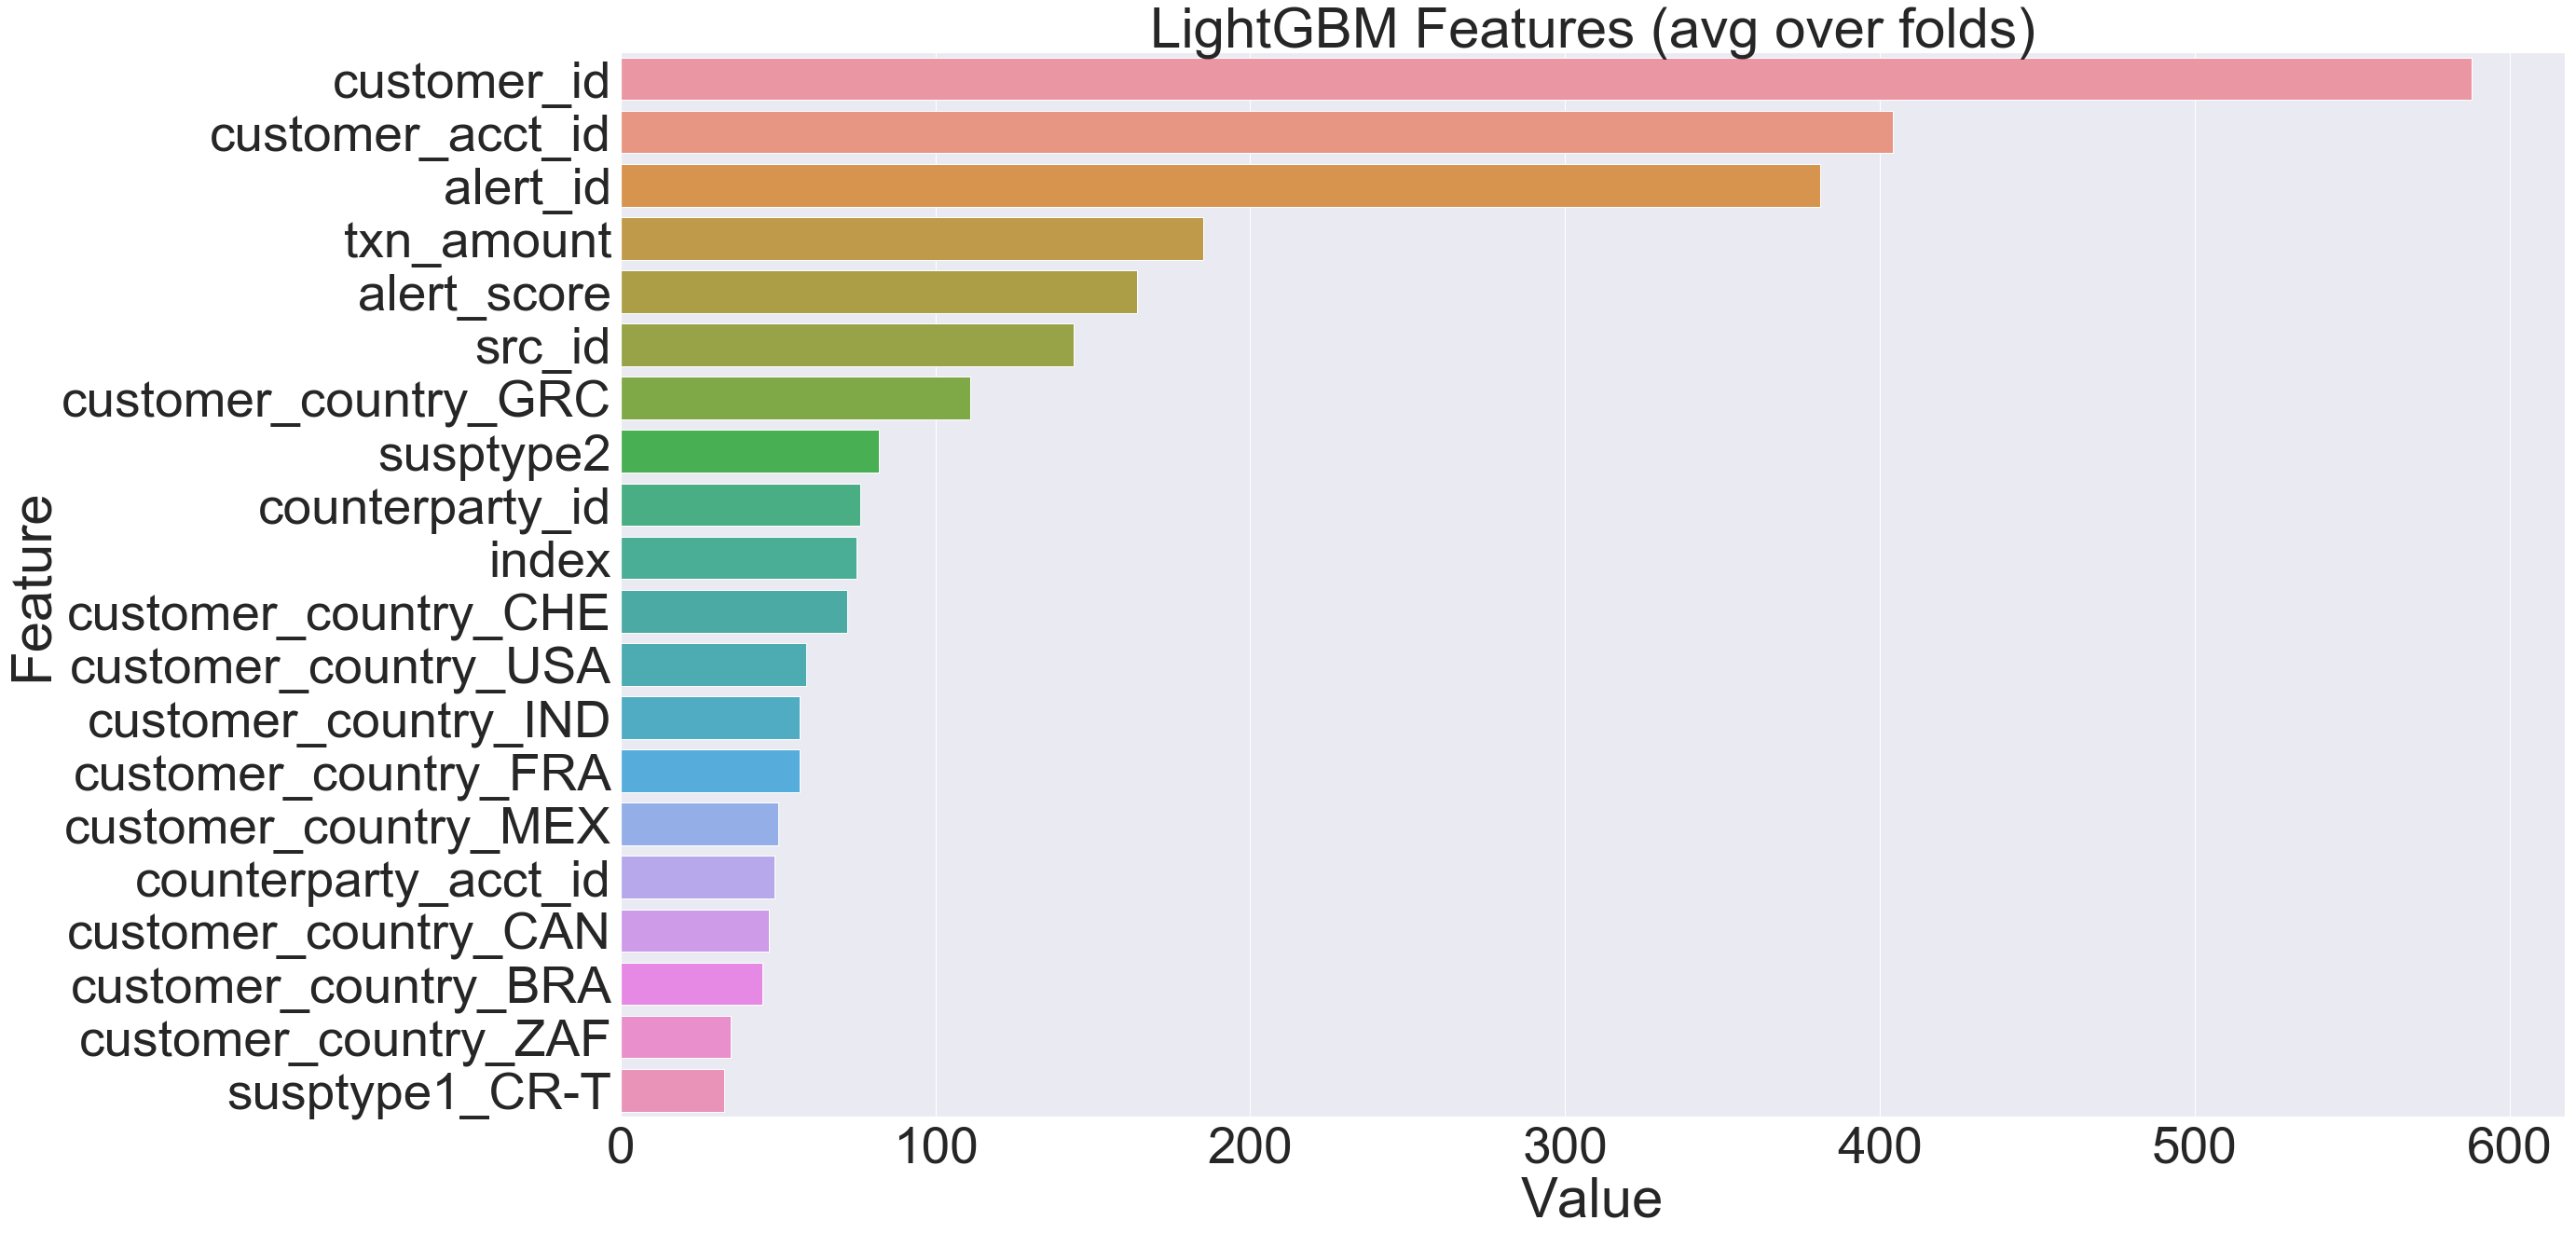

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                    ascending=False)[0:20])
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()

In [51]:
df_encoded=df_encoded.fillna(0)

In [52]:
df_encoded['disposition']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
253534    1.0
253535    1.0
253536    1.0
253537    1.0
253538    1.0
253539    1.0
253540    1.0
253541    1.0
253542    1.0
253543    1.0
253544    1.0
253545    1.0
253546    1.0
253547    1.0
253548    1.0
253549    1.0
253550    1.0
253551    1.0
253552    1.0
253553    1.0
253554    1.0
253555    1.0
253556    1.0
253557    1.0
253558    1.0
253559    1.0
253560    1.0
253561    1.0
253562    1.0
253563    0.0
Name: disposition, Length: 253564, dtype: float64

In [53]:
list(X.columns)

['index',
 'txn_id',
 'txn_amount',
 'txn_desc',
 'customer_id',
 'customer_acct_id',
 'customer_acct_bal',
 'branch_id',
 'counterparty_id',
 'counterparty_acct_id',
 'counterparty_first_name',
 'counterparty_last_name',
 'counterparty_state',
 'alert_id',
 'src_sys',
 'src_id',
 'end_ts',
 'susptype2',
 'susptype3',
 'alert_score',
 'peer_group',
 'desc_1',
 'desc_2',
 'desc_3',
 'review_state',
 'review_ts',
 'review_oper',
 'closed_ts',
 'disposition_oper',
 'year',
 'day',
 'hour',
 'month',
 'txn_type_ATM',
 'txn_type_WIRE',
 'customer_country_AUT',
 'customer_country_BRA',
 'customer_country_CAN',
 'customer_country_CHE',
 'customer_country_CHN',
 'customer_country_DEU',
 'customer_country_DNK',
 'customer_country_ESP',
 'customer_country_FIN',
 'customer_country_FRA',
 'customer_country_GBR',
 'customer_country_GRC',
 'customer_country_IND',
 'customer_country_ITA',
 'customer_country_JPN',
 'customer_country_MEX',
 'customer_country_NLD',
 'customer_country_NOR',
 'customer_co

In [54]:
model.feature_name()

['Column_0',
 'Column_1',
 'Column_2',
 'Column_3',
 'Column_4',
 'Column_5',
 'Column_6',
 'Column_7',
 'Column_8',
 'Column_9',
 'Column_10',
 'Column_11',
 'Column_12',
 'Column_13',
 'Column_14',
 'Column_15',
 'Column_16',
 'Column_17',
 'Column_18',
 'Column_19',
 'Column_20',
 'Column_21',
 'Column_22',
 'Column_23',
 'Column_24',
 'Column_25',
 'Column_26',
 'Column_27',
 'Column_28',
 'Column_29',
 'Column_30',
 'Column_31',
 'Column_32',
 'Column_33',
 'Column_34',
 'Column_35',
 'Column_36',
 'Column_37',
 'Column_38',
 'Column_39',
 'Column_40',
 'Column_41',
 'Column_42',
 'Column_43',
 'Column_44',
 'Column_45',
 'Column_46',
 'Column_47',
 'Column_48',
 'Column_49',
 'Column_50',
 'Column_51',
 'Column_52',
 'Column_53',
 'Column_54',
 'Column_55',
 'Column_56',
 'Column_57',
 'Column_58',
 'Column_59',
 'Column_60',
 'Column_61',
 'Column_62',
 'Column_63',
 'Column_64',
 'Column_65',
 'Column_66',
 'Column_67',
 'Column_68',
 'Column_69',
 'Column_70',
 'Column_71',
 '

In [55]:
def prob(data):
    return np.array(list(zip(1-model.predict(data),model.predict(data))))

In [56]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(df_encoded[list(X.columns)].astype(int).values,  
mode='classification',training_labels=df_encoded['disposition'],feature_names=list(X.columns))


# asking for explanation for LIME model
i = 1
exp = explainer.explain_instance(df_encoded.loc[i,list(X.columns)].astype(int).values, prob, num_features=5)


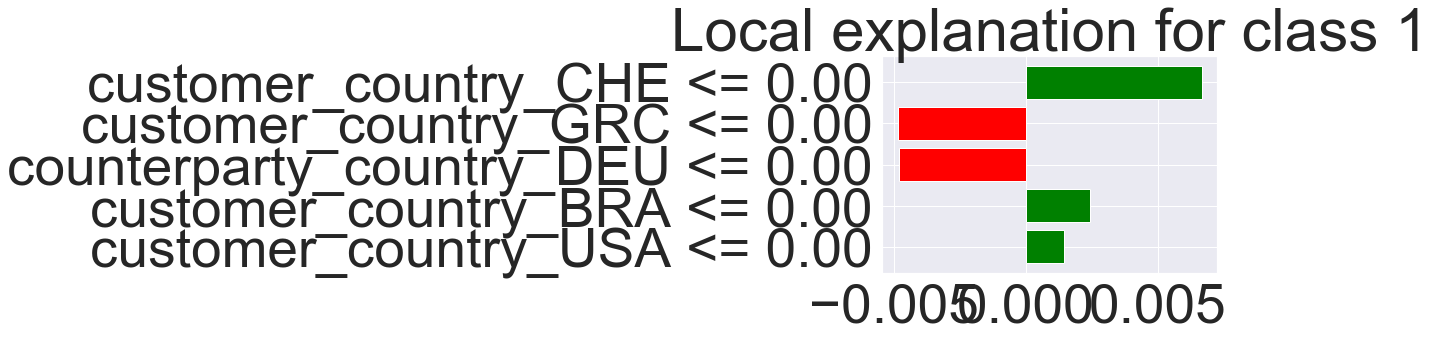

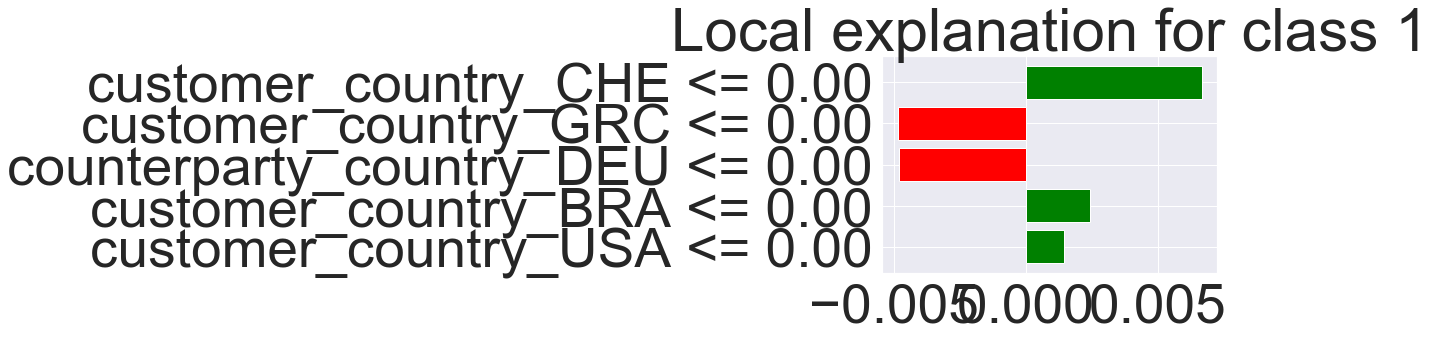

In [57]:
exp.as_pyplot_figure(label=1)

In [58]:
i = 2
exp = explainer.explain_instance(df_encoded.loc[i,list(X.columns)].astype(int).values, prob, num_features=5)

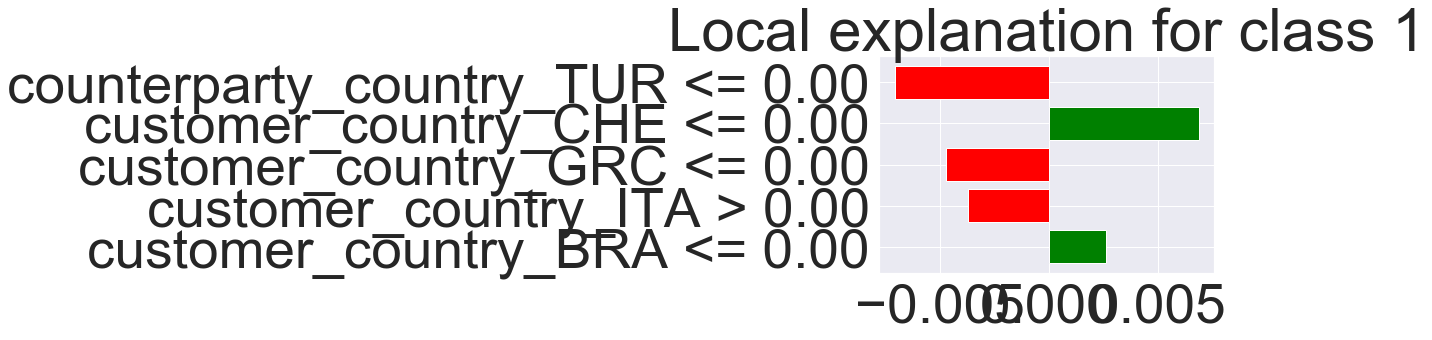

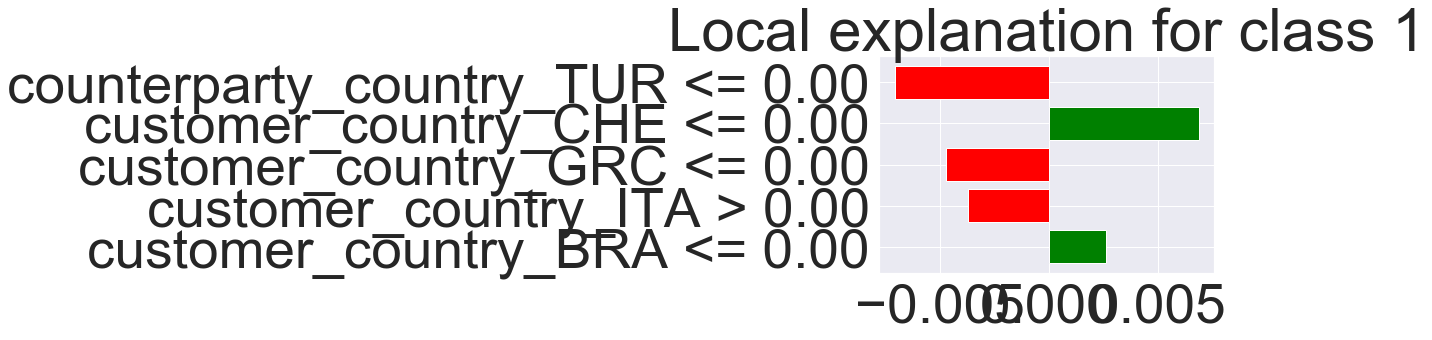

In [59]:
exp.as_pyplot_figure(label=1)

In [60]:
exp.show_in_notebook(show_table=True)

In [61]:
X.iloc[0,:]

index                           0.000000
txn_id                      50000.000000
txn_amount                    139.120000
txn_desc                             NaN
customer_id                 17850.000000
customer_acct_id             4926.000000
customer_acct_bal                    NaN
branch_id                            NaN
counterparty_id             69975.000000
counterparty_acct_id         5947.000000
counterparty_first_name              NaN
counterparty_last_name               NaN
counterparty_state                   NaN
alert_id                     1753.000000
src_sys                         1.000000
src_id                       1753.000000
end_ts                               NaN
susptype2                       4.000000
susptype3                            NaN
alert_score                    92.314796
peer_group                           NaN
desc_1                               NaN
desc_2                               NaN
desc_3                               NaN
review_state    

In [62]:
import shap

# load JS visualization code to notebook
shap.initjs()


# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [63]:
shap_values

array([[-1.43198396e-01,  4.05175726e-02,  2.46010052e-01, ...,
         5.71690002e-05,  4.39910998e-04,  6.47909430e-03],
       [-1.41867789e-01,  4.05168911e-02,  2.50980163e-01, ...,
        -3.94204400e-04,  3.17591419e-04, -1.01529529e-03],
       [-1.44733968e-01,  4.05094995e-02,  2.45902771e-01, ...,
         2.93031113e-05, -1.45776819e-03, -1.01363144e-03],
       ...,
       [-5.13564506e-03,  4.04384934e-02,  2.96115002e-01, ...,
        -4.33510171e-04,  1.80739119e-03, -3.94560293e-04],
       [-4.88431269e-03,  4.04394356e-02,  2.96172919e-01, ...,
         5.30373862e-05,  1.84006126e-03,  7.91983217e-03],
       [-5.30969704e-03,  1.43372846e-02,  1.41014080e-01, ...,
        -1.05137919e-04,  5.30115985e-04,  3.59117678e-04]])

In [62]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [61]:
X.iloc[0,:]

index                           0.000000
txn_id                      50000.000000
txn_amount                    139.120000
txn_desc                             NaN
customer_id                 17850.000000
customer_acct_id             4926.000000
customer_acct_bal                    NaN
branch_id                            NaN
counterparty_id             69975.000000
counterparty_acct_id         5947.000000
counterparty_first_name              NaN
counterparty_last_name               NaN
counterparty_state                   NaN
alert_id                     1753.000000
src_sys                         1.000000
src_id                       1753.000000
end_ts                               NaN
susptype2                       4.000000
susptype3                            NaN
alert_score                    92.314796
peer_group                           NaN
desc_1                               NaN
desc_2                               NaN
desc_3                               NaN
review_state    

In [63]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

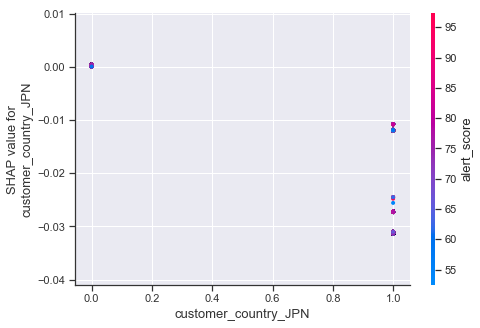

In [66]:
shap.dependence_plot("customer_country_JPN", shap_values, X)

/usr/local/lib/python3.7/site-packages/shap/plots/summary.py:211: RuntimeWarning: invalid value encountered in greater
  cvals[cvals_imp > vmax] = vmax
/usr/local/lib/python3.7/site-packages/shap/plots/summary.py:212: RuntimeWarning: invalid value encountered in less
  cvals[cvals_imp < vmin] = vmin
/usr/local/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


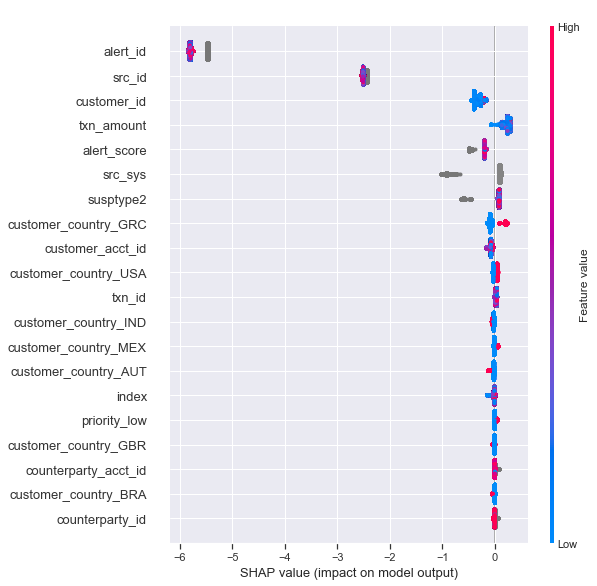

In [67]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

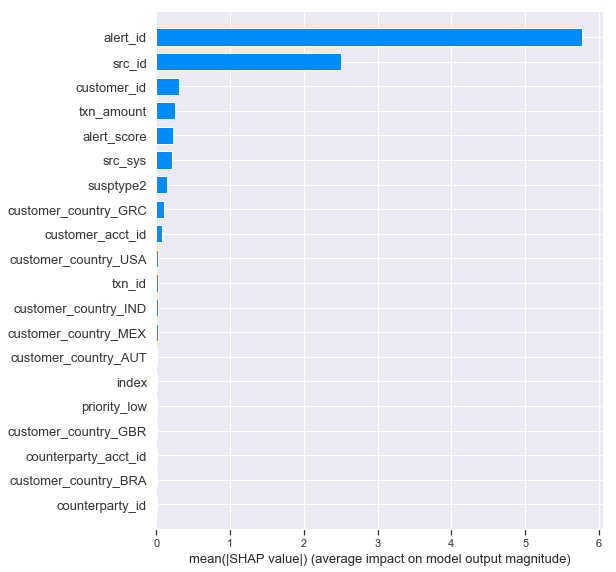

In [68]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [ ]:
# Code for SP-LIME
import warnings
from lime import submodular_pick

# Remember to convert the dataframe to matrix values
# SP-LIME returns exaplanations on a sample set to provide a non redundant global decision boundary of original model
sp_obj = submodular_pick.SubmodularPick(explainer, df_encoded[list(X.columns)].values, \
prob, num_features=5,num_exps_desired=10)
#sp_obj.sp_explanations[0].as_pyplot_figure(label=1)
#[exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

In [ ]:
sp_obj.sp_explanations[0].as_pyplot_figure(label=1)
#[exp.as_pyplot_figure(label=1) for exp in sp_obj.sp_explanations]

In [101]:
print(feature_imp)

    Value                   Feature
0      75                     index
1      20                    txn_id
2     185                txn_amount
3       0                  txn_desc
4     588               customer_id
5     404          customer_acct_id
6       0         customer_acct_bal
7       0                 branch_id
8      76           counterparty_id
9      49      counterparty_acct_id
10      0   counterparty_first_name
11      0    counterparty_last_name
12      0        counterparty_state
13    381                  alert_id
14     29                   src_sys
15    144                    src_id
16      0                    end_ts
17     82                 susptype2
18      0                 susptype3
19    164               alert_score
20      0                peer_group
21      0                    desc_1
22      0                    desc_2
23      0                    desc_3
24      0              review_state
25      0                 review_ts
26      0               revi

In [50]:
feature_imp.to_csv("sample_output.csv", index = True, sep=',', encoding='utf-8')
